##Step 1) Import Libraries

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


##Step 2) Load data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",'Sneaker','Bag',"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

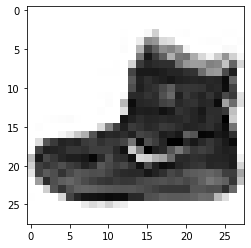

In [ ]:
plt.imshow(X_train[0],cmap='Greys')


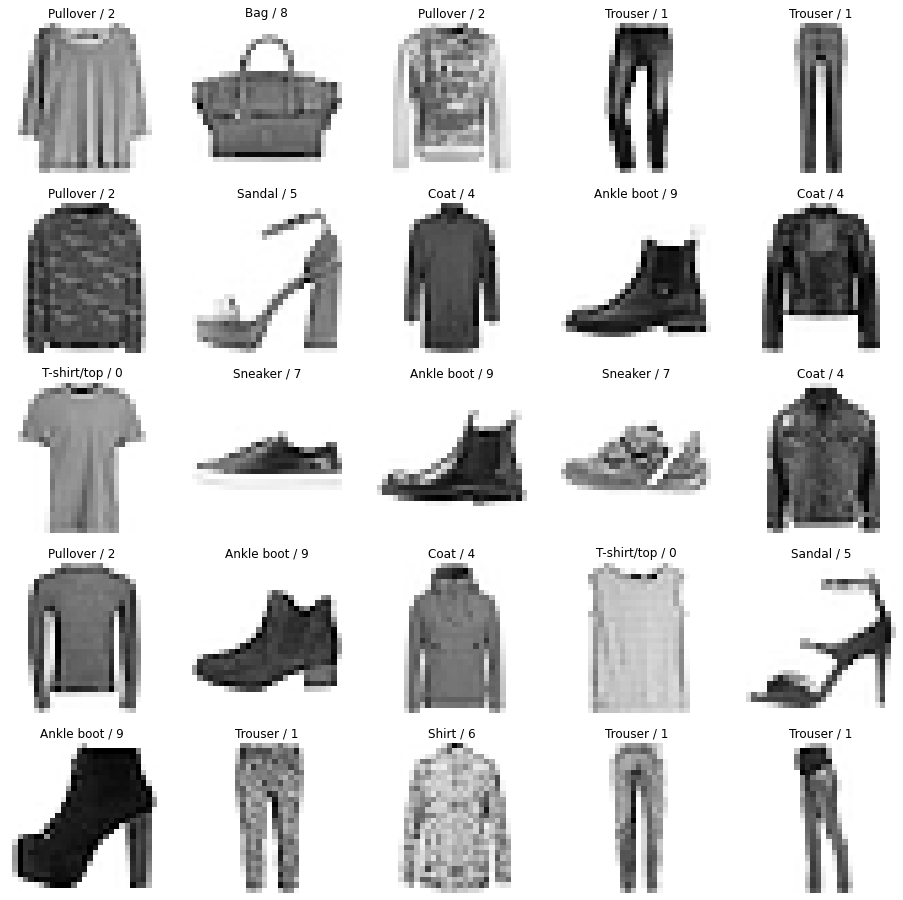

In [ ]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim


3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train = X_train/255
X_test= X_test/255

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.4,random_state=210)

In [ ]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((36000, 28, 28, 1), (24000, 28, 28, 1), (36000,), (24000,))

##Step 3) Buiding the CNN model


In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=1024,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/50
36/36 [==============================] - 31s 843ms/step - loss: 0.8896 - accuracy: 0.7273 - val_loss: 0.5061 - val_accuracy: 0.8189
Epoch 2/50
36/36 [==============================] - 18s 491ms/step - loss: 0.4501 - accuracy: 0.8401 - val_loss: 0.4108 - val_accuracy: 0.8594
Epoch 3/50
36/36 [==============================] - 17s 469ms/step - loss: 0.3942 - accuracy: 0.8604 - val_loss: 0.3725 - val_accuracy: 0.8705
Epoch 4/50
36/36 [==============================] - 17s 471ms/step - loss: 0.3529 - accuracy: 0.8772 - val_loss: 0.3707 - val_accuracy: 0.8668
Epoch 5/50
36/36 [==============================] - 17s 470ms/step - loss: 0.3289 - accuracy: 0.8856 - val_loss: 0.3385 - val_accuracy: 0.8815
Epoch 6/50
36/36 [==============================] - 17s 471ms/step - loss: 0.3095 - accuracy: 0.8912 - val_loss: 0.3273 - val_accuracy: 0.8841
Epoch 7/50
36/36 [==============================] - 19s 523ms/step - loss: 0.2969 - accuracy: 0.8967 - val_loss: 0.3139 - val_accuracy: 0.8882

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 3s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.11, 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.3039 - accuracy: 0.9075


[0.3038882911205292, 0.9075000286102295]

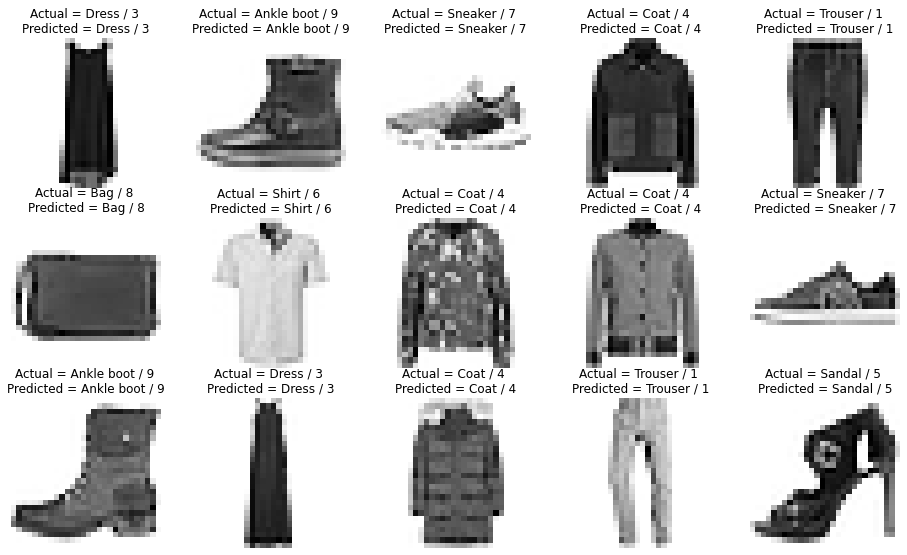

In [ ]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 2000,15):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

ValueError: ignored

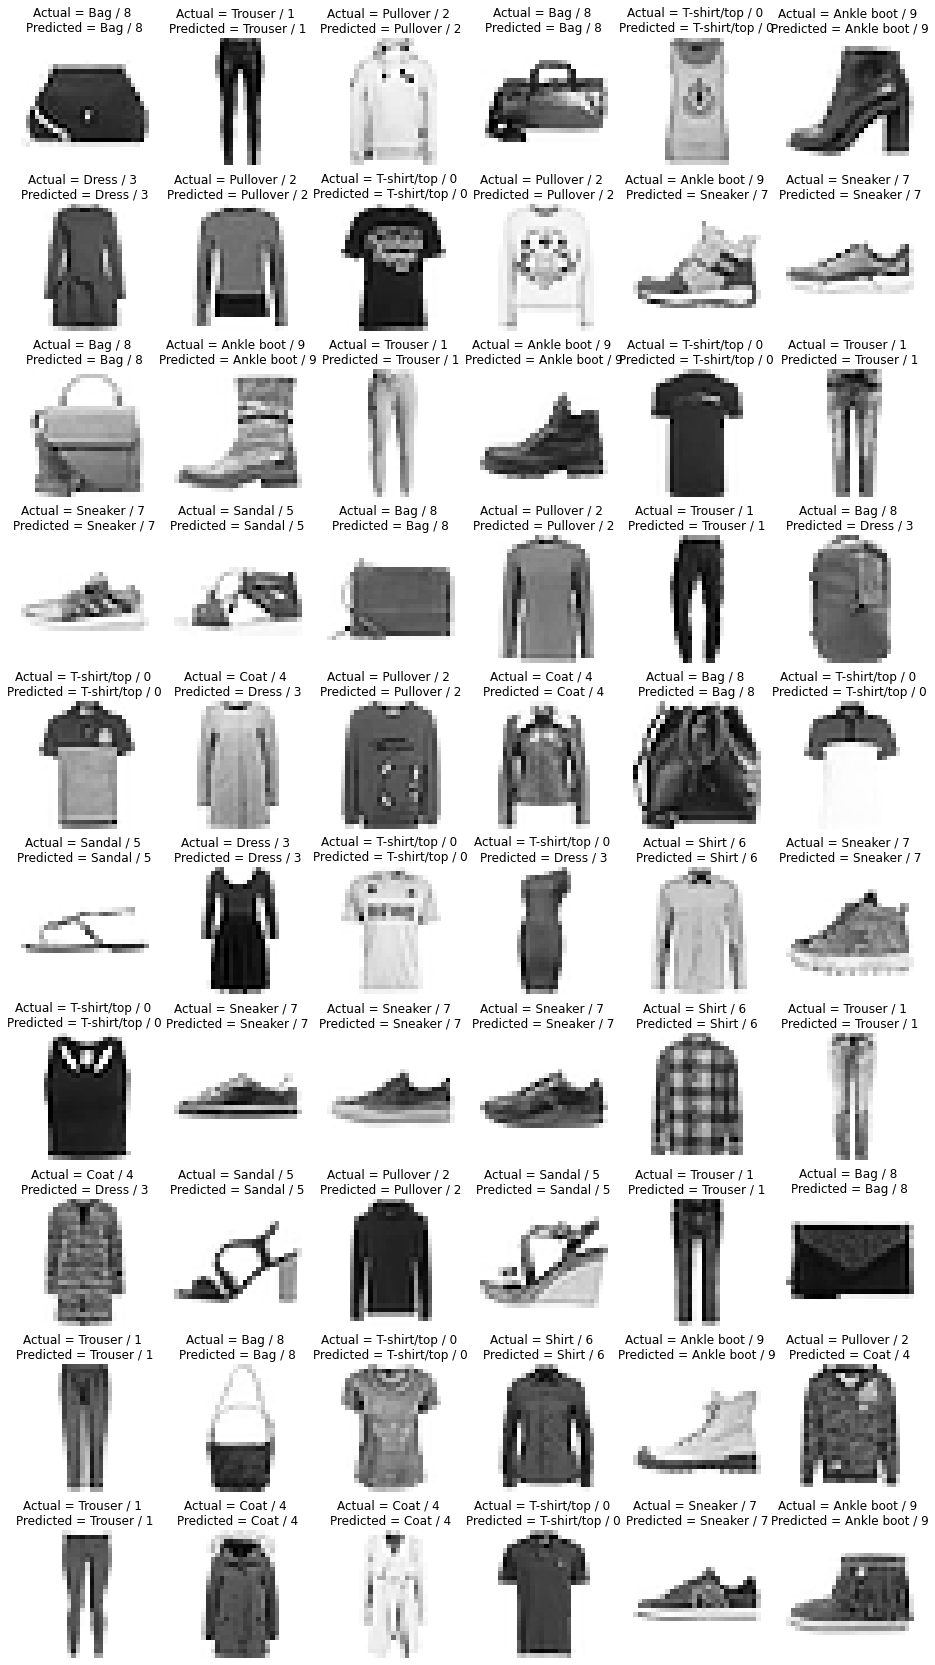

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1500,90):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


##Confussion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
     

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.84      0.89      0.86      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.83      0.89      0.86      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.83      0.65      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



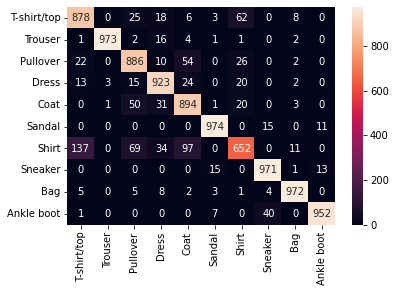

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)
     

##Saving Model

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

## Building Complex CNN 2

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=1024, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)


Epoch 1/20
71/71 [==============================] - 23s 311ms/step - loss: 1.1746 - accuracy: 0.5596 - val_loss: 0.6640 - val_accuracy: 0.7422
Epoch 2/20
71/71 [==============================] - 23s 325ms/step - loss: 0.6164 - accuracy: 0.7615 - val_loss: 0.5116 - val_accuracy: 0.8106
Epoch 3/20
71/71 [==============================] - 22s 311ms/step - loss: 0.5064 - accuracy: 0.8102 - val_loss: 0.4679 - val_accuracy: 0.8204
Epoch 4/20
71/71 [==============================] - 24s 337ms/step - loss: 0.4512 - accuracy: 0.8336 - val_loss: 0.4054 - val_accuracy: 0.8522
Epoch 5/20
71/71 [==============================] - 22s 311ms/step - loss: 0.4090 - accuracy: 0.8487 - val_loss: 0.3823 - val_accuracy: 0.8610
Epoch 6/20
71/71 [==============================] - 25s 347ms/step - loss: 0.3805 - accuracy: 0.8596 - val_loss: 0.3632 - val_accuracy: 0.8668
Epoch 7/20
71/71 [==============================] - 22s 309ms/step - loss: 0.3548 - accuracy: 0.8692 - val_loss: 0.3378 - val_accuracy: 0.8757

[0.37500032782554626, 0.9028000235557556]